Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class distribution after resampling: [227451 227451]
=== Logistic Regression Results ===
Confusion Matrix:
[[55352  1512]
 [    8    90]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

=== Random Forest Results ===
Confusion Matrix:
[[56852    12]
 [   17    81]]
Classification Report:
              precision  

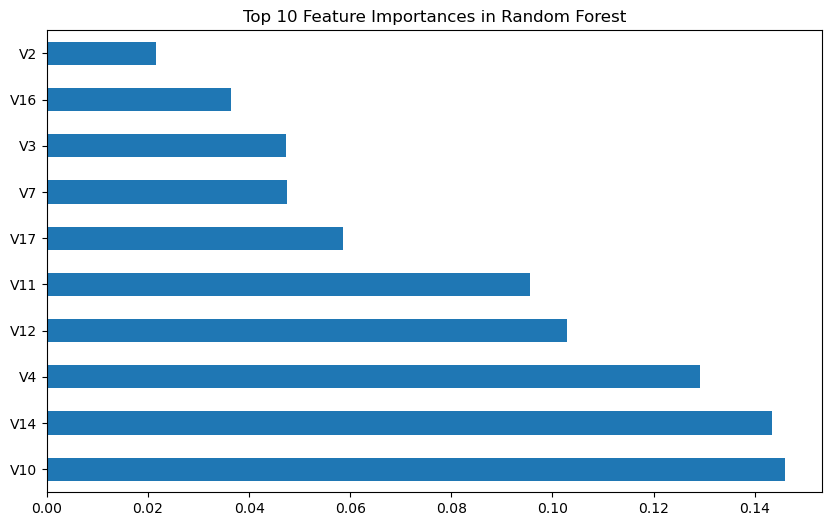

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "E:/creditcard.csv"  
data = pd.read_csv(file_path)

print(data.isnull().sum())  


scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

data = data.drop(columns=['Time'])

X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Class distribution after resampling:", np.bincount(y_train_res))

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

log_y_pred = log_model.predict(X_test)
rf_y_pred = rf_model.predict(X_test)

print("=== Logistic Regression Results ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, log_y_pred))
print("Classification Report:")
print(classification_report(y_test, log_y_pred))

print("=== Random Forest Results ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))

log_precision = precision_score(y_test, log_y_pred)
log_recall = recall_score(y_test, log_y_pred)
log_f1 = f1_score(y_test, log_y_pred)

rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f"\nLogistic Regression: Precision={log_precision:.4f}, Recall={log_recall:.4f}, F1-Score={log_f1:.4f}")
print(f"Random Forest: Precision={rf_precision:.4f}, Recall={rf_recall:.4f}, F1-Score={rf_f1:.4f}")

plt.figure(figsize=(10, 6))
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest')
plt.show()
